In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread('fotos/img1.png')
img = cv2.resize(img, (720, 720))
img = cv2.GaussianBlur(img, (3,3), 0)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

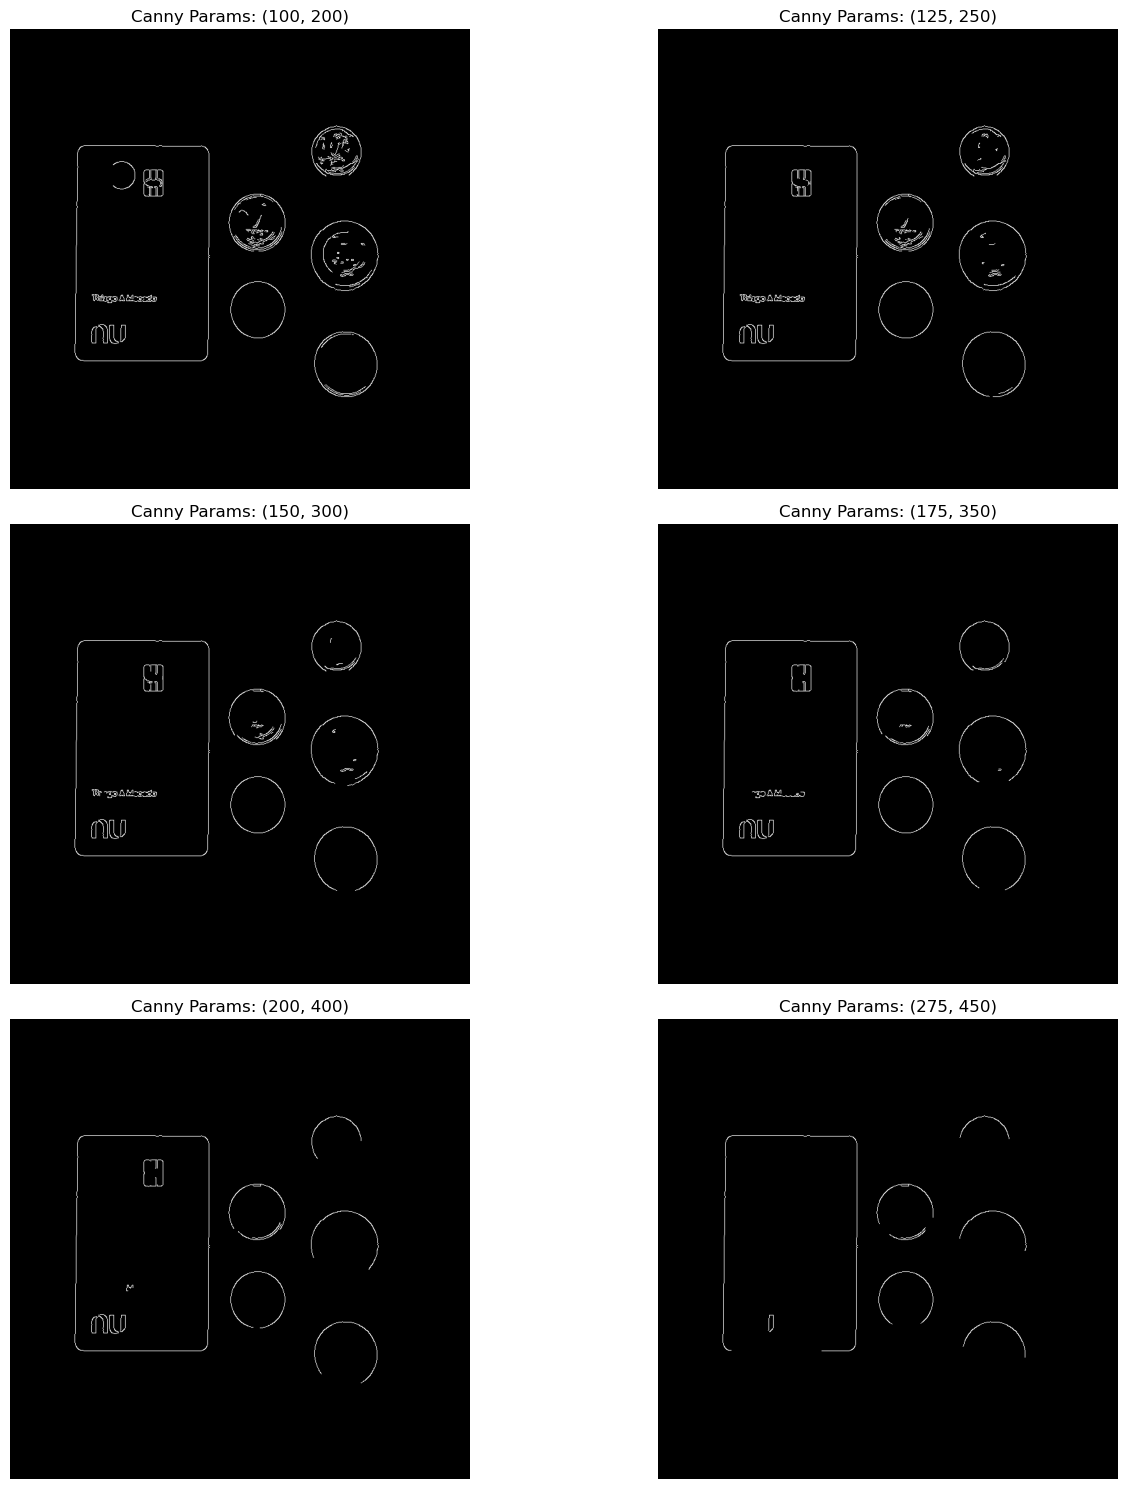

In [4]:
def test_canny_params(img, canny_params_list):
    num_params = len(canny_params_list)
    num_rows = int(num_params / 2) + (num_params % 2)

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))
    axes = axes.flatten()

    for i, (low, high) in enumerate(canny_params_list):
        edges = cv2.Canny(img, low, high)
        axes[i].imshow(edges, cmap='gray')
        axes[i].set_title(f'Canny Params: ({low}, {high})')
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()
    
# Assuming img_gray is a grayscale image
canny_params_to_try = [(100, 200), (125, 250), (150, 300), (175, 350), (200, 400), (275, 450)]

test_canny_params(img, canny_params_to_try)

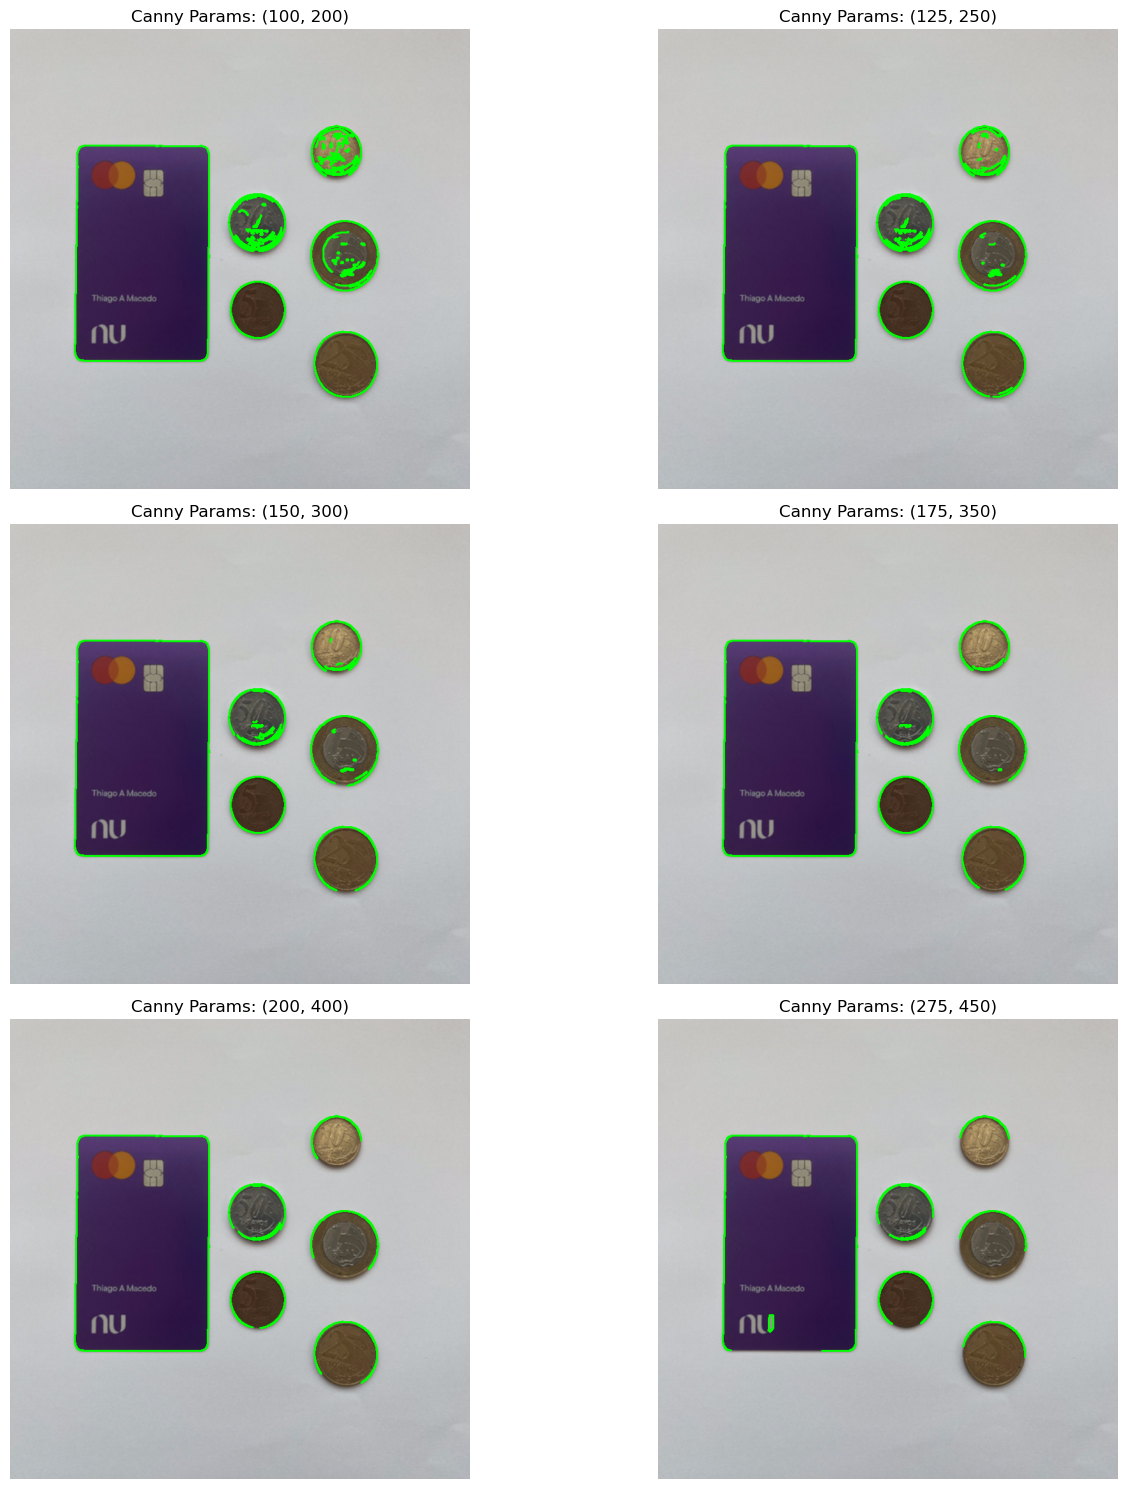

In [5]:
import matplotlib.pyplot as plt

def test_canny_params_with_contours(img, canny_params_list):
    num_params = len(canny_params_list)
    num_rows = int(num_params / 2) + (num_params % 2)

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))
    axes = axes.flatten()

    for i, (low, high) in enumerate(canny_params_list):
        # Detect contours using Canny edge detection
        contours, _ = cv2.findContours(cv2.Canny(img, low, high), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Create a copy of the original image
        img_with_contours = img_rgb.copy()

        # Draw the detected contours on the copy of the original image
        cv2.drawContours(img_with_contours, contours, -1, (0, 255, 0), 2)

        # Display the image with the detected contours using plt
        axes[i].imshow(img_with_contours)
        axes[i].set_title(f'Canny Params: ({low}, {high})')
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Assuming img is a color image
canny_params_to_try = [(100, 200), (125, 250), (150, 300), (175, 350), (200, 400), (275, 450)]

test_canny_params_with_contours(img, canny_params_to_try)


[7877.0, 5887.0, 46.0, 1.5, 16.5, 2.0, 1.0, 6.0, 7.5, 1.0, 1.0, 6.0, 5.0, 5.5, 5.0, 2.0, 0.0, 0.0, 0.0, 0.5, 6.5, 16.5, 5.5, 8.0, 2.5, 3.0, 12.0, 23.0, 14.0, 1.0, 15.0, 2.0, 21.5, 86.0, 27.0, 6.5, 2.0, 0.0, 6.5, 103.0, 0.5, 1.5, 4.5, 6.0, 2.0, 5.0, 1.0, 5.0, 130.5, 4.0, 0.0, 2.5, 69545.0, 3.0, 3.0, 2.0, 2.0, 9.0, 13.5, 17.5, 61.0]
[2.0, 81.0, 5887.0, 13.5, 45.5, 1.0, 0.0, 7.0, 1.0, 0.0, 0.0, 6.5, 3.5, 4.5, 10.5, 2.0, 22.0, 14.0, 1.0, 7.5, 1.5, 21.5, 86.0, 25.0, 0.0, 6.5, 103.0, 0.5, 75.5, 0.5, 21.5, 2.5, 69545.0, 2.0, 7.0, 12.0, 61.0]
[79.0, 5887.0, 5.5, 41.5, 7.0, 3.0, 2.0, 9.5, 22.0, 2.0, 13.0, 7.0, 16.5, 1.0, 86.0, 87.5, 2.5, 65.5, 69545.0, 0.5, 61.0]
[71.0, 5887.0, 0.0, 3.0, 21.0, 16.5, 6.0, 79.0, 82.0, 15.5, 69545.0, 48.5]
[56.5, 73.0, 18.0, 16.5, 55.5, 78.5, 69545.0, 36.5]
[40.0, 5.5, 63.0, 11.5, 9.0, 47.0, 74.0, 20.0, 33.5]


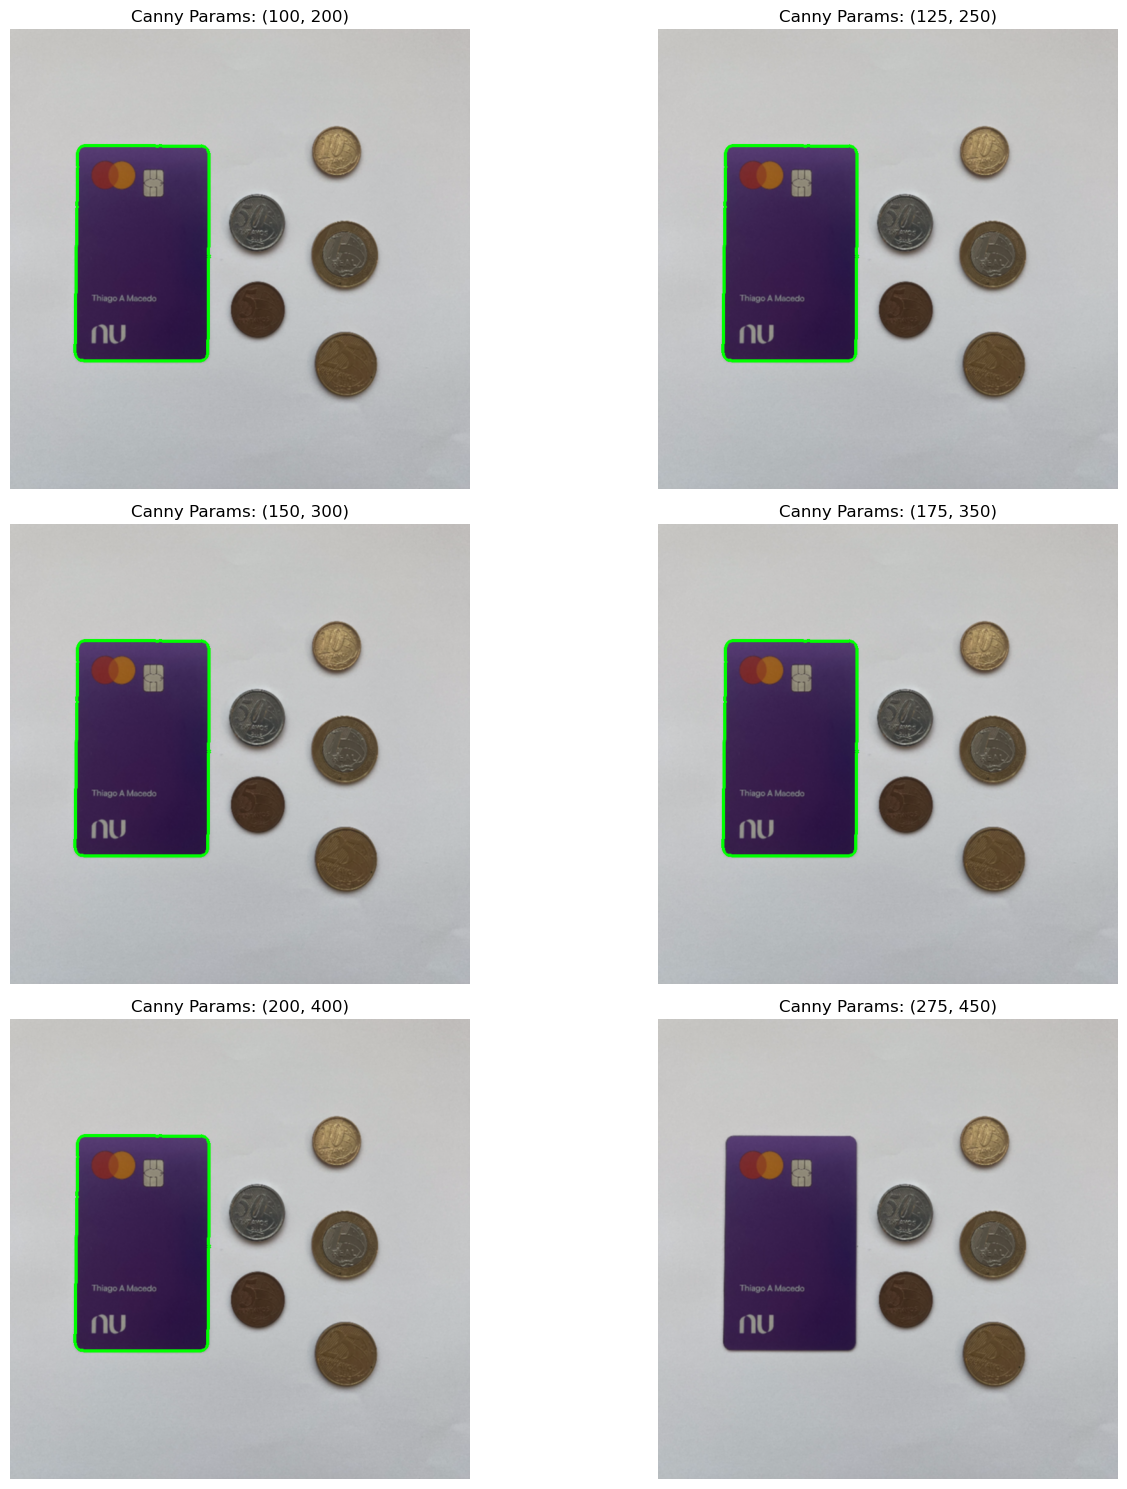

In [9]:
import matplotlib.pyplot as plt

def test_canny_params_with_contours(img, canny_params_list):
    num_params = len(canny_params_list)
    num_rows = int(num_params / 2) + (num_params % 2)

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))
    axes = axes.flatten()

    # tamanho mínimo e máximo da area do cartao de credito
    min_area = 10000
    max_area = 90000

    for i, (low, high) in enumerate(canny_params_list):
        # Detect contours using Canny edge detection
        edges = cv2.Canny(img, low, high)
        contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        areas = [cv2.contourArea(x) for x in contours]
        print(areas)

        # Filter contours of the credit card
        contorno_cartao = [x for x in contours if min_area < cv2.contourArea(x) < max_area]

        # Create a copy of the original image
        img_with_contours = img_rgb.copy()

        # Draw the detected contours on the copy of the original image
        cv2.drawContours(img_with_contours, contorno_cartao, -1, (0, 255, 0), 4)

        # Display the image with the detected contours using plt
        axes[i].imshow(img_with_contours)
        axes[i].set_title(f'Canny Params: ({low}, {high})')
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()
    
# Assuming img is a color image
canny_params_to_try = [(100, 200), (125, 250), (150, 300), (175, 350), (200, 400), (275, 450)]

test_canny_params_with_contours(img, canny_params_to_try)

Image 1: ppcm=39.49
Image 2: ppcm=39.49
Image 3: ppcm=39.49
Image 4: ppcm=39.49
Image 5: ppcm=39.49


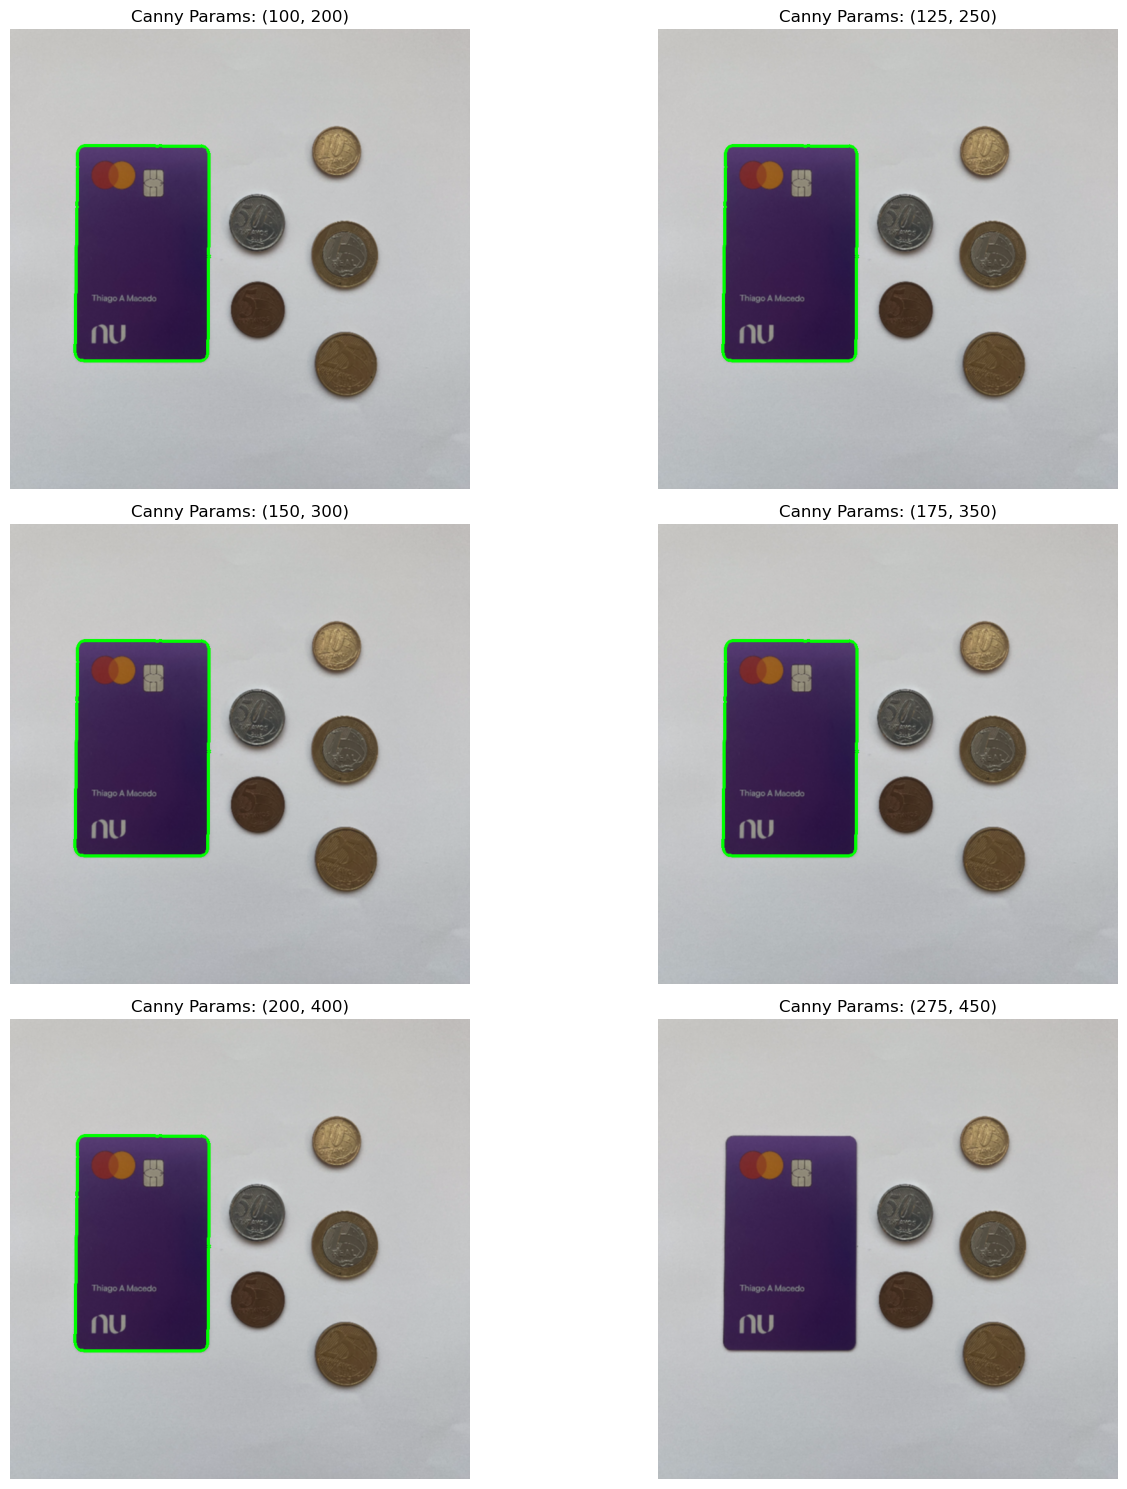

In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def test_canny_params_with_contours(img, canny_params_list):
    num_params = len(canny_params_list)
    num_rows = int(num_params / 2) + (num_params % 2)

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))
    axes = axes.flatten()

    # tamanho mínimo e máximo da area do cartao de credito
    min_area = 10000
    max_area = 7000000

    for i, (low, high) in enumerate(canny_params_list):
        # Detect contours using Canny edge detection
        edges = cv2.Canny(img, low, high)
        contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Filter contours of the credit card
        contorno_cartao = [x for x in contours if min_area < cv2.contourArea(x) < max_area]

        # Create a copy of the original image
        img_with_contours = img_rgb.copy()

        # Draw the detected contours on the copy of the original image
        cv2.drawContours(img_with_contours, contorno_cartao, -1, (0, 255, 0), 4)

        # Display the image with the detected contours using plt
        axes[i].imshow(img_with_contours)
        axes[i].set_title(f'Canny Params: ({low}, {high})')
        axes[i].axis('off')

        # Calculate the ppcm value using the height of the credit card in pixels
        if contorno_cartao:
            tam_cartao = (8.56, 5.398)
            x, y, w, h = cv2.boundingRect(contorno_cartao[0])
            ppcm = h / tam_cartao[0]
            print(f'Image {i+1}: ppcm={ppcm:.2f}')

    plt.tight_layout()
    plt.show()

# Assuming img is a color image
canny_params_to_try = [(100, 200), (125, 250), (150, 300), (175, 350), (200, 400), (275, 450)]

test_canny_params_with_contours(img, canny_params_to_try)